### 1.0 Import Libraries

In [75]:
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

### 2.0 Use BeautifulSoup and Urlopen to Retrieve Data

In [76]:
url = 'https://www.basketball-reference.com/leagues/NBA_2019_advanced.html'

html = urlopen(url)

soup = BeautifulSoup(html)

### 2.1 Get Headers from DataFrame

In [77]:
# soup.findAll('tr', limit=2) is finding all 'tr' tags, limit=2 ..... And .getText() is pulling the text of 'th'
headers = [th.getText() for th in soup.findAll('tr')[0].findAll('th')]

headers = headers[1:]

### 2.2 Get Data from Rows

In [78]:
rows = soup.findAll('tr')

player_stats_1 = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

### 3.0 Create DataFrame

In [79]:
og_df = pd.DataFrame(data=player_stats_1[1:], columns=headers)

In [80]:
og_df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Álex Abrines,SG,25,OKC,31,588,6.3,.507,.809,.083,...,,0.1,0.6,0.6,.053,,-2.4,-0.9,-3.4,-0.2
1,Quincy Acy,PF,28,PHO,10,123,2.9,.379,.833,.556,...,,-0.1,0.0,-0.1,-0.022,,-5.7,-0.3,-5.9,-0.1
2,Jaylen Adams,PG,22,ATL,34,428,7.6,.474,.673,.082,...,,-0.1,0.2,0.1,.011,,-3.1,-1.3,-4.4,-0.3
3,Steven Adams,C,25,OKC,80,2669,18.5,.591,.002,.361,...,,5.1,4.0,9.1,.163,,0.6,2.1,2.7,3.2
4,Bam Adebayo,C,21,MIA,82,1913,17.9,.623,.031,.465,...,,3.4,3.4,6.8,.171,,-0.6,3.6,3.0,2.4


In [81]:
og_df['MP'] = og_df['MP'].apply(pd.to_numeric, errors='coerce')

### 3.1 Control Size of Player Sample by Minimum Minutes Played

In [82]:
min_mins_played = 1000

og_df = og_df[og_df['MP'] > min_mins_played]

og_df = og_df.reset_index()

og_df = og_df.drop('index',axis=1)

In [83]:
df = og_df.copy()

### 4.0 Convert to Numbers and Drop Unnecessary Columns

In [84]:
# Convert everything but player names and positions to numbers and coerce non-numbers into NaNs
df = df.iloc[:,2:].apply(pd.to_numeric, errors='coerce')

In [85]:
# Save list of player names and positions for later
df['Player'] = og_df['Player']
df['Pos'] = og_df['Pos']

In [86]:
# Keep specific columns
columns_to_keep = ['Player', 'Pos', 'Age', 'TS%', '3PAr', 'FTr', 'ORB%', 
                   'AST%', 'TOV%', 'USG%', 'STL%', 'BLK%', 'DBPM', 'WS']

df = pd.DataFrame(df[columns_to_keep], columns=columns_to_keep)

In [87]:
# Converts ordinal variable (Pos) into numeric
df['Pos'] = df['Pos'].map({'PG': 1, 'SG': 2, 'SF': 3, 'PF': 4, 'C': 5})

In [88]:
df = df.dropna()

In [89]:
df.head()

,Player,Pos,Age,TS%,3PAr,FTr,ORB%,AST%,TOV%,USG%,STL%,BLK%,DBPM,WS
0,Steven Adams,5.0,25,0.591,0.002,0.361,14.7,6.6,12.6,16.4,2.0,2.4,2.1,9.1
1,Bam Adebayo,5.0,21,0.623,0.031,0.465,9.2,14.2,17.1,15.8,1.8,3.0,3.6,6.8
2,LaMarcus Aldridge,5.0,33,0.576,0.032,0.312,10.3,11.6,8.8,26.9,0.8,3.4,0.5,9.3
3,Jarrett Allen,5.0,20,0.632,0.079,0.489,9.6,7.9,13.0,15.9,1.0,4.5,3.2,7.6
4,Al-Farouq Aminu,4.0,28,0.568,0.472,0.292,5.3,6.0,9.7,13.7,1.4,1.2,0.8,5.8


### 4.1 Import 'DRAYMOND' data from FiveThirtyEight

In [90]:
df1 = pd.read_csv('draymond.csv', sep=',')

In [91]:
df1 = df1[df1['season'] == 2019]

In [92]:
total_df = pd.merge(df, df1, left_on='Player', right_on='player')

In [93]:
total_df = total_df.drop(['player', 'season', 'possessions'], axis=1)

In [94]:
total_df = total_df[['Player', 'Pos', 'Age', 'TS%', '3PAr', 'FTr', 'ORB%', 'AST%', 'TOV%',
       'USG%', 'STL%', 'BLK%', 'DBPM', 'DRAYMOND', 'WS']]

total_df.head()

,Player,Pos,Age,TS%,3PAr,FTr,ORB%,AST%,TOV%,USG%,STL%,BLK%,DBPM,DRAYMOND,WS
0,Steven Adams,5.0,25,0.591,0.002,0.361,14.7,6.6,12.6,16.4,2.0,2.4,2.1,0.776581,9.1
1,Bam Adebayo,5.0,21,0.623,0.031,0.465,9.2,14.2,17.1,15.8,1.8,3.0,3.6,0.734847,6.8
2,LaMarcus Aldridge,5.0,33,0.576,0.032,0.312,10.3,11.6,8.8,26.9,0.8,3.4,0.5,1.818261,9.3
3,Jarrett Allen,5.0,20,0.632,0.079,0.489,9.6,7.9,13.0,15.9,1.0,4.5,3.2,0.870878,7.6
4,Al-Farouq Aminu,4.0,28,0.568,0.472,0.292,5.3,6.0,9.7,13.7,1.4,1.2,0.8,-0.922840,5.8


In [95]:
print('There are ' + str(len(total_df['Player'].unique())) + ' unique players who qualify for this clustering.')
print('There are ' + str(len(total_df)) + ' total player names in this dataframe.')

There are 244 unique players who qualify for this clustering.
There are 264 total player names in this dataframe.


### 4.2 Convert Pandas DataFrame into Matrix for Processing

In [96]:
df_as_matrix = total_df.values

### 5.0 Import and Scale Vectors

In [97]:
from sklearn.preprocessing import scale

In [98]:
scaled_vectors = scale(df_as_matrix[:,1:-1], axis=0)

/Users/seanmcalevey/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


### 5.01 Control Center

In [100]:
# PCA Control: 

n_components = 3 # Could increase to '4' to retain more info...

# First cluster:

num_clusters = 5 # For the five standard position groups

# First LDA:

number_of_components = 2 # To reduce to 2 dimensions

# Second cluster:

num_clusters_2 = 7 # Use elbow method to determine

### 5.1 Import PCA and Reduce Dimensionality

In [101]:
from sklearn.decomposition import PCA

In [102]:
def pca_reduce(n_components, scaled_vectors):
    
    pca = PCA(n_components)
    
    dim_reduction = pca.fit_transform(scaled_vectors)
    
    explained_variance_1 = round(100*sum(pca.explained_variance_ratio_), 3)

    print('Retained info after PCA: ' + str(explained_variance_1) + '%')
    
    return dim_reduction, explained_variance_1, pca

In [103]:
dim_reduction, explained_variance_1, pca = pca_reduce(n_components, scaled_vectors)

Retained info after PCA: 64.263%


In [104]:
pca.components_

array([[ 0.37630133, -0.04966449,  0.28717782, -0.3174387 ,  0.30041074,
         0.4074001 , -0.12226985,  0.08011104, -0.01514797, -0.01116329,
         0.39724897,  0.36430781,  0.32283459],
       [-0.213441  ,  0.05423354, -0.0600775 , -0.26815191,  0.28533954,
        -0.0331927 ,  0.57857517,  0.42368777,  0.39363247,  0.33062691,
        -0.05982291,  0.08863698, -0.05924494],
       [-0.10006785,  0.08725406, -0.29460785,  0.1634279 , -0.27731924,
        -0.09549361, -0.03602599,  0.21574188, -0.46862132,  0.52268685,
         0.14731797,  0.42524413,  0.19914978]])

In [105]:
reduced_df = total_df.copy()

reduced_df['PCA1'] = [dim_reduction[x][0] for x in range(len(dim_reduction))]

reduced_df['PCA2'] = [dim_reduction[x][1] for x in range(len(dim_reduction))]

reduced_df['PCA3'] = [dim_reduction[x][2] for x in range(len(dim_reduction))]

### 5.2 Cluster with KMeans

In [106]:
from sklearn.cluster import KMeans

In [107]:
def cluster_kmeans(num_clusters, dim_reduction, random_state=40):
    
    cluster = KMeans(num_clusters, random_state=random_state)
    
    clusters = cluster.fit_predict(dim_reduction)
    
    return clusters

In [108]:
clusters = cluster_kmeans(num_clusters, dim_reduction, random_state=40)

In [110]:
reduced_df['Cluster'] = clusters

reduced_df = reduced_df.reset_index(drop=True)

### 5.3 Cluster Averages Table

In [111]:
averages_dict = {}

total_per_cluster = {}

for cluster in reduced_df['Cluster'].unique():
    
    cluster_group = reduced_df[reduced_df['Cluster'] == cluster]
    
    averages_dict[cluster] = np.mean(cluster_group)
    
    total_per_cluster[cluster] = len(cluster_group)

In [112]:
averages_df = pd.DataFrame.from_dict(averages_dict, orient='index', columns=reduced_df.drop('Player',axis=1).columns)

In [113]:
averages_df['Total Players'] = total_per_cluster.values()

In [114]:
averages_df = averages_df.apply(lambda x: round(x, 3))

In [115]:
averages_df = averages_df[['Cluster', 'Pos', 'Age', 'TS%', '3PAr', 'FTr', 'ORB%', 'AST%', 'TOV%', 'USG%',
       'STL%', 'BLK%', 'DBPM', 'DRAYMOND', 'Total Players']]

In [116]:
averages_df['Cluster'] = averages_df['Cluster'].apply(lambda x: int(x))

averages_df = averages_df.sort_values(by='Pos', ascending=True)

averages_df['Cluster Name'] = ['Point guards', 'Shooting guards', 'Small forwards', 'Power forwards', 'Centers']

In [117]:
averages_df.sort_values(by='Pos', ascending=True)

,Cluster,Pos,Age,TS%,3PAr,FTr,ORB%,AST%,TOV%,USG%,STL%,BLK%,DBPM,DRAYMOND,Total Players,Cluster Name
2,2,1.439,27.632,0.545,0.342,0.280,2.468,28.323,13.888,24.807,1.756,0.918,-0.793,-0.594,57,Point guards
1,1,2.204,26.510,0.536,0.445,0.187,3.049,13.780,13.122,15.561,1.973,1.559,0.890,0.455,49,Shooting guards
4,4,2.534,26.295,0.552,0.505,0.179,2.686,10.369,9.485,18.370,1.199,0.935,-1.288,-0.591,88,Small forwards
0,0,4.233,26.674,0.581,0.253,0.289,6.912,12.144,11.667,20.670,1.319,2.526,0.742,0.619,43,Power forwards
3,3,4.963,25.000,0.626,0.066,0.435,11.548,11.185,13.248,19.589,1.504,4.563,2.959,1.702,27,Centers


### 5.4 Linear Discriminant Analysis w/ Clusters as Targets

In [118]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [119]:
def lda_reduce(number_of_components, dim_reduction, clusters, lda_num=1):
    
    discriminator = LinearDiscriminantAnalysis(n_components=number_of_components)
    
    X = dim_reduction

    y = clusters # targets
    
    discriminated = discriminator.fit_transform(X, y)
    
    explained_variance_2 = round(100*sum(discriminator.explained_variance_ratio_), 3)

    print('Retained info after ' + str(lda_num) + ' LDA: ' + str(explained_variance_2) + '%')
    
    return discriminated, explained_variance_2

In [120]:
discriminated, explained_variance_2 = lda_reduce(number_of_components, dim_reduction, clusters)

Retained info after 1 LDA: 90.127%


In [122]:
reduced_df['LDA1'] = [discriminated[x][0] for x in range(len(dim_reduction))]

reduced_df['LDA2'] = [discriminated[x][1] for x in range(len(dim_reduction))]

### 5.5 KMeans Clustering #2

In [124]:
elbow_clusters = []

for num_of_clusters in range(2,10):
    cluster = KMeans(num_of_clusters)
    cluster.fit(discriminated)
    elbow_clusters.append(cluster.inertia_)

In [125]:
clusters_2 = cluster_kmeans(num_clusters_2, discriminated, random_state=20)

In [126]:
reduced_df['Cluster_2'] = clusters_2

### 5.6 2nd Cluster Averages Table

In [127]:
averages_dict_2 = {}

total_per_cluster_2 = {}

for cluster in reduced_df['Cluster_2'].unique():
    
    cluster_group = reduced_df[reduced_df['Cluster_2'] == cluster]
    
    averages_dict_2[cluster] = np.mean(cluster_group)
    
    total_per_cluster_2[cluster] = len(cluster_group)

In [128]:
averages_df_2 = pd.DataFrame.from_dict(averages_dict_2, orient='index', 
                                       columns=reduced_df.drop('Player',axis=1).columns)

averages_df_2['Total Players'] = total_per_cluster_2.values()

averages_df_2 = averages_df_2.apply(lambda x: round(x, 3))

averages_df_2 = averages_df_2[['Cluster_2', 'Pos', 'Age', 'TS%', '3PAr', 'FTr', 'ORB%', 'AST%', 'TOV%', 'USG%',
       'STL%', 'BLK%', 'DBPM', 'DRAYMOND', 'Total Players']]

averages_df_2['Cluster_2'] = averages_df_2['Cluster_2'].apply(lambda x: int(x))

In [129]:
averages_df_2 = averages_df_2.sort_values(by='Pos', ascending=True)

averages_df_2['Cluster Name'] = ['Star guards', 'Combo guards', 'Pure shooters', 'Three-and-D Wings',
                                 'Point forwards', 'Stretch bigs', 'Centers']

In [130]:
averages_df_2.sort_values(by='Pos', ascending=True)

,Cluster_2,Pos,Age,TS%,3PAr,FTr,ORB%,AST%,TOV%,USG%,STL%,BLK%,DBPM,DRAYMOND,Total Players,Cluster Name
1,1,1.458,27.417,0.543,0.342,0.272,2.523,28.813,14.708,24.348,1.954,1.067,-0.281,-0.392,48,Star guards
2,2,1.605,26.558,0.529,0.434,0.197,2.114,17.616,11.458,19.405,1.621,0.779,-1.065,-0.861,43,Combo guards
5,5,2.320,27.020,0.549,0.561,0.148,2.012,9.112,9.022,16.820,1.200,0.842,-1.302,-0.568,50,Pure shooters
6,6,3.128,26.149,0.564,0.461,0.219,4.062,9.432,10.717,17.683,1.379,1.547,-0.064,0.258,47,Three-and-D Wings
3,3,3.250,26.375,0.558,0.257,0.306,4.196,18.267,13.925,22.258,1.675,1.783,0.862,0.534,24,Point forwards
4,4,4.600,26.560,0.588,0.226,0.271,8.780,9.860,11.332,18.900,1.220,3.092,0.948,0.896,25,Stretch bigs
0,0,4.963,25.000,0.626,0.066,0.435,11.548,11.185,13.248,19.589,1.504,4.563,2.959,1.702,27,Centers


In [131]:
cluster_map = {0: 'Centers', 1: 'Star guards', 2: 'Combo guards', 3: 'Point forwards', 4: 'Stretch bigs', 
               5: 'Pure shooters', 6: 'Three-and-D wings'}

In [132]:
import matplotlib.pyplot as plt

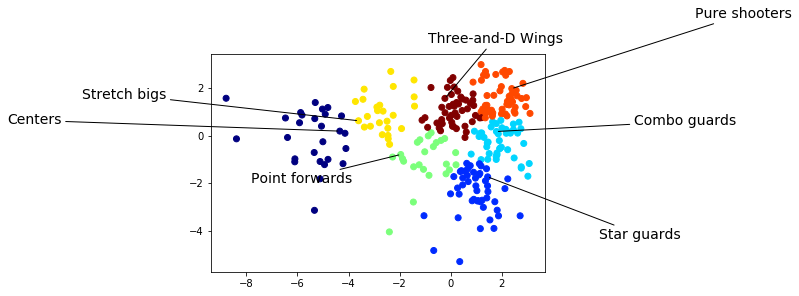

In [133]:
cmap = plt.cm.get_cmap('jet', reduced_df['Cluster_2'].nunique())

ax = plt.axes()

ax.scatter(reduced_df['LDA1'], reduced_df['LDA2'], c=reduced_df['Cluster_2'], cmap=cmap)

clusters_added = []

# The 'i' and '5' are just used for aesthetic purposes:
for i in range(len(reduced_df['Cluster_2'])):
    
    if reduced_df['Cluster_2'][i] not in clusters_added:
        
        clusters_added.append(reduced_df['Cluster_2'][i])
        
        index = int(reduced_df['Cluster_2'][i])
        
        ax.annotate(averages_df_2['Cluster Name'][index], # text
                    (reduced_df['LDA1'][i], reduced_df['LDA2'][i]), # x,y coordinates for each point
                    (4*reduced_df['LDA1'][i], 2.5*reduced_df['LDA2'][i]), # label's distance from point
                    arrowprops = {'arrowstyle': '-'}, fontsize=14) # arrow style

### 5.99 Dissimilarity Calculator

In [134]:
total_player_diff = []

for player in reduced_df['Player']:
    
    new_index = reduced_df['Player'].tolist().index(player)
    
    player_stats = np.asarray(reduced_df.iloc[new_index,:])
    
    sub_player_diff = []
    
    for i in range(len(reduced_df)):
        lda1, lda2 = player_stats[-3], player_stats[-2]
        ilda1, ilda2 = reduced_df['LDA1'][i], reduced_df['LDA2'][i]
        total_1 = lda1 - ilda1
        total_2 = lda2 - ilda2
        l2_norm = np.sqrt(total_1 ** 2 + total_2 ** 2)
        sub_player_diff.append(l2_norm)
    
    sub_mean = np.mean(sub_player_diff)
    
    total_player_diff.append(sub_mean)

total_mean, total_std = np.mean(total_player_diff), np.std(total_player_diff)

### 6.0 Player and Comps

In [135]:
# Input player name:

player_name = input('Player name: ')

# Retrieve index of player name:

index = reduced_df['Player'].tolist().index(f'{player_name}')

# Pull player's stats:

player_stats = reduced_df.iloc[index,:]

player_stats = np.asarray(player_stats)

Player name: LeBron James


### 6.1 Selected Comp

In [136]:
comp_name = input('Comp player name: ')

comp_index = reduced_df['Player'].tolist().index(f'{comp_name}')

comp_stats = reduced_df.iloc[comp_index,:]

comp_stats = np.asarray(comp_stats)

Comp player name: Kevin Durant


### 6.2 Calculate L2-Norms

In [137]:
# Loop through and create a list of L2-Norms:

player_diff = []

for i in range(len(reduced_df)):
    lda1, lda2 = player_stats[-3], player_stats[-2]
    ilda1, ilda2 = reduced_df['LDA1'][i], reduced_df['LDA2'][i]
    total_1 = lda1 - ilda1
    total_2 = lda2 - ilda2
    l2_norm = np.sqrt(total_1 ** 2 + total_2 ** 2)
    player_diff += [(i,l2_norm)]

# And for just Target Comp:

lda1, lda2 = player_stats[-3], player_stats[-2]
ilda1, ilda2 = comp_stats[-3], comp_stats[-2]
total_1 = lda1 - ilda1
total_2 = lda2 - ilda2
l2_norm = np.sqrt(total_1 ** 2 + total_2 ** 2)
target_comp = l2_norm

In [138]:
# Initialize:

comp_1, it_1, comp_2, it_2, comp_3, it_3 = [x for x in np.zeros(6) + 3]

# 1. Best Comp:

for i in range(len(player_diff)):
    if (player_diff[i][1] < comp_1) and (player_diff[i][1] > 0):
        comp_1 = player_diff[i][1]
        it_1 = i

# 2. Second Comp:

for i in range(len(player_diff)):
    if (player_diff[i][1] < comp_2) and (player_diff[i][1] > comp_1):
        comp_2 = player_diff[i][1]
        it_2 = i

# 3. Third Comp:

for i in range(len(player_diff)):
    if (player_diff[i][1] < comp_3) and (player_diff[i][1] > comp_1) and (player_diff[i][1] > comp_2):
        comp_3 = player_diff[i][1]
        it_3 = i

print(it_1, it_2, it_3)



95 80 63


In [139]:
# Dissimilarity (dissim_factor) calculation to add to final comp_df:

dissimilarity = 0

for i in range(len(player_diff)):
    
    dissimilarity += player_diff[i][1]

dissimilarity = dissimilarity / len(player_diff)

dissim_factor = (dissimilarity - total_mean) / total_std

### 7.0 Player Comp Df

In [140]:
player_comp_df = pd.DataFrame()

player_comp_df['Actual Player'] = reduced_df.iloc[index,1:]
player_comp_df['Top Comp'] = reduced_df.iloc[it_1,1:]
player_comp_df['Second-Best Comp'] = reduced_df.iloc[it_2,1:]
player_comp_df['Third-Best Comp'] = reduced_df.iloc[it_3,1:]
player_comp_df['Target Comp'] = reduced_df.iloc[comp_index,1:]

In [141]:
comp_df = pd.DataFrame(np.transpose(player_comp_df.values))

list_of_columns = list(total_df.columns.drop('Player')) + ['PCA1', 'PCA2', 'PCA3', 'Cluster', 'LDA1', 'LDA2', 
                                                           'Cluster_2']

comp_df.columns = list_of_columns

comp_df['Player'] = [reduced_df.iloc[index,0], reduced_df.iloc[it_1,0], reduced_df.iloc[it_2,0],
                     reduced_df.iloc[it_3,0], reduced_df.iloc[comp_index,0]]

In [142]:
player_subject = pd.Series(scaled_vectors[index, :])

comp_a = pd.Series(scaled_vectors[it_1, :])
comp_b = pd.Series(scaled_vectors[it_2, :])
comp_c = pd.Series(scaled_vectors[it_3, :])
comp_target = pd.Series(scaled_vectors[comp_index, :])

scaled_array = np.array([player_subject, comp_a, comp_b, comp_c, comp_target])

new_columns = ['sPos', 'sAge', 'sTS%', 's3PAr', 'sFTr', 'sORB%', 'sAST%', 'sTOV%', 
               'sUSG%', 'sSTL%', 'sBLK%', 'sDBPM', 'sDRAY']

for i, column in enumerate(new_columns):
    comp_df[column] = [round(scaled_array[x][i], 2) for x in range(5)]

In [143]:
comp_df['Similarity Score'] = [1, round(1 - comp_1/dissimilarity, 3), round(1 - comp_2/dissimilarity, 3), 
                               round(1 - comp_3/dissimilarity, 3), round(1 - target_comp/dissimilarity, 3)]

In [144]:
keep_columns = comp_df.columns

keep_columns = ['Player', 'Pos', 'Age', 'sPos', 'sAge', 'sTS%', 's3PAr',
       'sFTr', 'sORB%', 'sAST%', 'sTOV%', 'sUSG%', 'sSTL%', 'sBLK%', 'sDBPM', 'sDRAY',
       'Similarity Score', 'Cluster_2']

comp_df = comp_df[keep_columns]

In [145]:
comp_df.columns = ['Player', 'Pos', 'Age', 'sPos', 'sAge', 'sTS%', 's3PAr',
       'sFTr', 'sORB%', 'sAST%', 'sTOV%', 'sUSG%', 'sSTL%', 'sBLK%', 'sDBPM', 'sDRAY',
       'Similarity', 'Cluster_2']

In [146]:
comp_df['sDRAY'] = comp_df['sDRAY'].apply(lambda x: round(x,2))

# comp_df['sDissim.'] = [round(dissim_factor,3)] + ['n/a' for x in range(4)]

comp_df['Cluster_2'] = comp_df['Cluster_2'].map(cluster_map)

In [147]:
comp_df

,Player,Pos,Age,sPos,sAge,sTS%,s3PAr,sFTr,sORB%,sAST%,sTOV%,sUSG%,sSTL%,sBLK%,sDBPM,sDRAY,Similarity,Cluster_2
0,LeBron James,3,34,0.17,1.86,0.65,-0.38,1.22,-0.34,2.73,0.45,2.25,0.35,-0.19,1.09,0.29,1.000,Star guards
1,Draymond Green,4,28,0.89,0.36,-0.77,0.10,-0.28,-0.31,1.30,4.62,-1.26,1.28,0.76,1.94,1.37,0.836,Point forwards
2,De'Aaron Fox,1,21,-1.26,-1.38,-0.36,-0.84,1.19,-0.73,2.03,0.97,0.90,1.66,-0.12,0.01,-0.16,0.690,Star guards
3,DeMar DeRozan,2,29,-0.55,0.61,-0.41,-1.77,0.81,-0.59,1.39,-0.05,1.55,0.16,-0.39,0.29,-0.79,0.679,Star guards
4,Kevin Durant,3,30,0.17,0.86,1.63,-0.48,1.08,-0.81,1.24,0.14,1.76,-0.96,0.62,0.06,0.72,0.515,Point forwards
